<h3> Luis Garduno <h3>

Dataset: [__International Database (IDB)__](https://www.census.gov/data-tools/demo/idb/#/country?COUNTRY_YEAR=2022&COUNTRY_YR_ANIM=2022)

Question Of Interest: Predict the population of earth in 2122.

# Data Understanding

## Data Description

In [1]:
import numpy as np
import pandas as pd

# Load dataset into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/luisegarduno/MachineLearning_Projects/master/data/idb5yr.all', delimiter='|', encoding='ISO-8859-11')
# jack = list(df[['GENC']].isnull().sort_values(by='GENC').tail(151).index); jack.sort(); jack

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34237 entries, 0 to 34236
Data columns (total 99 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   #YR        34237 non-null  int64  
 1   TFR        26163 non-null  float64
 2   SRB        26163 non-null  float64
 3   RNI        26172 non-null  float64
 4   POP95_99   26171 non-null  float64
 5   POP90_94   26171 non-null  float64
 6   POP85_89   26171 non-null  float64
 7   POP80_84   26171 non-null  float64
 8   POP75_79   26171 non-null  float64
 9   POP70_74   26171 non-null  float64
 10  POP65_69   26171 non-null  float64
 11  POP60_64   26171 non-null  float64
 12  POP5_9     26171 non-null  float64
 13  POP55_59   26171 non-null  float64
 14  POP50_54   26171 non-null  float64
 15  POP45_49   26171 non-null  float64
 16  POP40_44   26171 non-null  float64
 17  POP35_39   26171 non-null  float64
 18  POP30_34   26171 non-null  float64
 19  POP25_29   26171 non-null  float64
 20  POP20_

---------------------------------

Printing out the information about the dataframe we are able to see that there are a total of 34,237 instances, and 98 attributes.

Additionally we are able to see that there are several attributes with similar names, most of which involve population (*POP*,*MPOP*, *FPOP*).

Attributes such as year, population, etc. will be of type integer (int64) because they will always be whole numbers. Attributes involving rates such as
fertility rate, mortality rate, etc. should be of double-precision floating-point format (float64). Lastly, attributes that help identify instances such as
a country/area's name or code number, should remain as type 'object', or string.

More than half of all of the attributes have been assigned to be the wrong data type, float. These (row #'s: 04-24, 30-51,& 59-80) should be assigned to be of data type int64, but because there is missing data within these attributes, we will leave them as float's for now.


Below is a brief description of some of the key attributes:     

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# describe dataframe
df.describe()

,#YR,TFR,SRB,RNI,POP95_99,POP90_94,POP85_89,POP80_84,POP75_79,POP70_74,...,CBR,ASFR45_49,ASFR40_44,ASFR35_39,ASFR30_34,ASFR25_29,ASFR20_24,ASFR15_19,AREA_KM2,POP_DENS
count,34237.000000,26163.000000,26163.000000,26172.000000,2.617100e+04,2.617100e+04,2.617100e+04,2.617100e+04,2.617100e+04,2.617100e+04,...,26172.000000,26173.000000,26173.000000,26173.000000,26173.000000,26173.000000,26173.000000,26173.000000,3.423700e+04,34237.000000
mean,2024.935158,2.389670,1.048942,0.689838,1.341227e+05,3.233068e+05,5.978935e+05,9.098194e+05,1.203613e+06,1.455750e+06,...,16.266128,6.679870,23.840914,66.986222,117.563743,129.103436,97.977113,35.557889,5.706972e+05,413.150892
std,43.571971,1.295389,0.024296,1.110296,8.987048e+05,1.909256e+06,3.207828e+06,4.536711e+06,5.665143e+06,6.538766e+06,...,10.377526,10.980604,26.059952,40.240942,44.610309,53.252973,63.056245,37.441517,1.688605e+06,1803.814127
min,1950.000000,0.837400,0.802900,-3.261000,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,1.600000e+01,3.900000e+01,...,4.880000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+00,0.000000
25%,1987.000000,1.700000,1.030200,-0.168000,2.880000e+02,1.395000e+03,3.636000e+03,6.887500e+03,1.157600e+04,1.649900e+04,...,9.110000,2.200000,12.000000,48.700000,98.200000,100.000000,60.000000,15.000000,4.033000e+03,29.400000
50%,2025.000000,1.812200,1.050000,0.433000,3.310000e+03,1.446600e+04,3.952200e+04,7.864300e+04,1.228230e+05,1.647700e+05,...,11.867300,3.000000,13.000000,51.400000,101.400000,107.300000,71.000000,19.100000,8.244500e+04,86.400000
75%,2063.000000,2.448000,1.058900,1.382000,3.862600e+04,1.225855e+05,2.563105e+05,4.230310e+05,5.808980e+05,7.336915e+05,...,19.570000,5.300000,22.400000,69.500000,121.700000,134.800000,110.000000,41.500000,4.373670e+05,220.400000
max,2100.000000,8.300000,1.469600,4.034000,2.686902e+07,4.834315e+07,7.025363e+07,8.897564e+07,1.026475e+08,1.112864e+08,...,58.860000,105.800000,201.000000,282.900000,345.400000,357.200000,363.300000,237.400000,1.637774e+07,24921.500000


| Name      | Label                                                                         | Type   |
| --------- | ----------------------------------------------------------------------------- | ------ |
| AREA_KM2  | Area in square kilometers                                                     | int    |
| ASFRXX_YY | Age specific fertility rate for women age XX-YY (births per 1,000 population) | float  |
| CBR       | Crude birth rate (births per 1,000 population)                                | float  |
| CDR       | Crude death rate (deaths per 1,000 population)                                | float  |
| E0        | Both sexes life expectancy at birth                                           | float  |
| E0_F      | Female life expectancy at birth                                               | float  |
| E0_M      | Male life expectancy at birth                                                 | float  |
| FIPS      | FIPS country or area code                                                     | string |
| FMR0_4    | Mortality rates for females under 5 years of age                              | float  |
| FMR1_4    | Mortality rates for females aged 1-4 years                                    | float  |
| FPOP      | Female midyear population                                                     | int    |
| FPOPXX_YY | Female midyear population aged XX-YY years                                    | int    |
| FPOP100_  | Female midyear population aged 100+ years                                     | int    |
| GENC      | Geopolitical Entities, Names, & Codes (GENC) 2 char. country code standard    | string |
| GR        | Growth rate (percent)                                                         | float  |
| GRR       | Gross reproduction rate (lifetime births per woman)                           | float  |
| IMR       | Both sexes Infant mortality rate (infant deaths per 1,000 population)         | float  |
| IMR_F     | Female infant mortality rate (infant deaths per 1,000 population)             | float  |
| IMR_M     | Male infant mortality rate (infant deaths per 1,000 population)               | float  |
| MMR0_4    | Mortality rates for males under 5 years of age                                | float  |
| MMR1_4    | Mortality rates for males aged 1-4 years                                      | float  |
| MPOP      | Male midyear population                                                       | int    |
| MPOPXX_YY | Male midyear population aged XX-YY years                                      | int    |
| MPOP100_  | Male midyear population aged 100+ years                                       | int    |
| MR0_4     | Total mortality rates under 5 years of age                                    | float  |
| MR1_4     | Total mortality rates aged 1-4 years                                          | float  |
| NAME      | Country or area name                                                          | string |
| NMR       | Net migration rate (net number of migrants per 1,000 population)              | float  |
| POP       | Total midyear population                                                      | int    |
| POP_DENS  | Population density (total population divided by area in square kilometers)    | float  |
| POPXX_YY  | Total midyear population aged XX-YY years                                     | int    |
| POP100_   | Total midyear population aged 100+ years                                      | int    |
| RNI       | Rate of natural increase (percent)                                            | float  |
| SRB       | Sex ratio at birth (males per female)                                         | float  |
| TFR       | Total fertility rate                                                          | float  |
| YR        | Year                                                                          | int    |

</br>

** Complete table with all variables, can be found here: [Census Data API](https://api.census.gov/data/timeseries/idb/5year/variables.html)


------------------------------

## Data Quality

YEAR           32
TFR          5491
SRB           962
RNI          3351
POP95_99     3099
             ... 
ASFR25_29    2208
ASFR20_24    2480
ASFR15_19    1610
AREA_KM2      226
POP_DENS     3227
Length: 99, dtype: int64

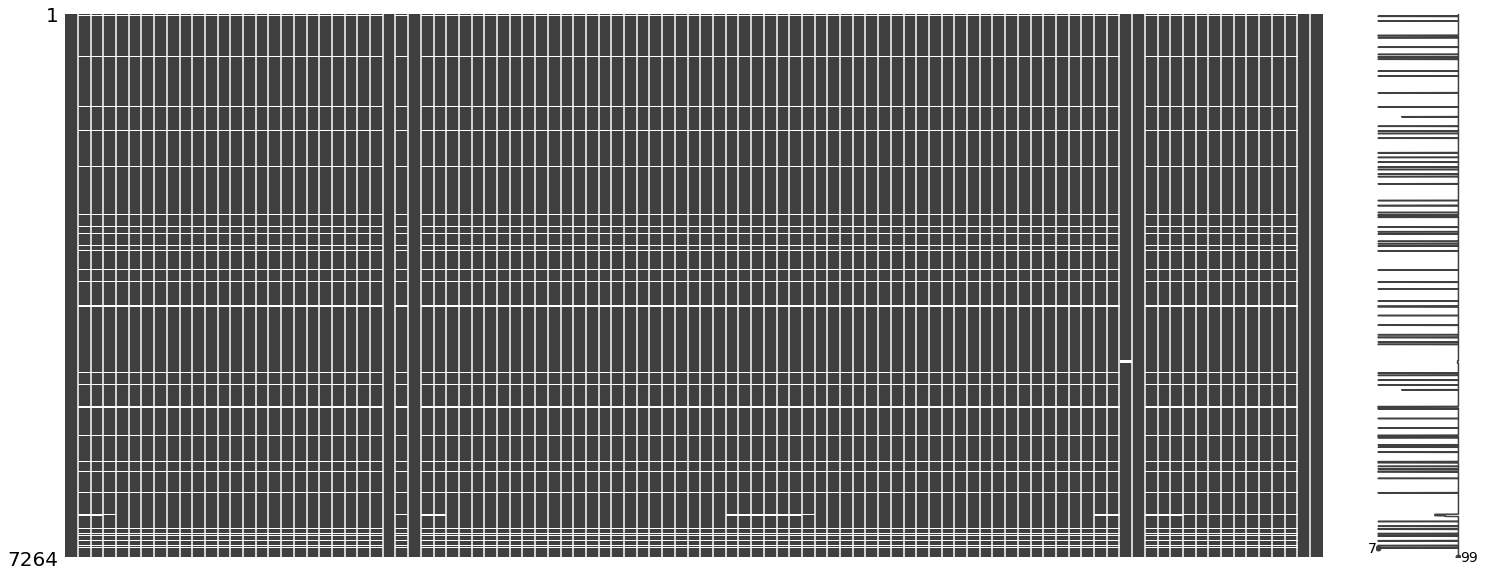

In [3]:
import copy
import missingno as mn

# Make year column easier to understand
df.rename(columns={'#YR':'YEAR'}, inplace=True)

df_full  = copy.deepcopy(df)
df = df.drop(df[df.YEAR >= 2022].index)
df = df.drop(df[df.YEAR < 1990].index)

# Check for any missing/null values within dataset
mn.matrix(df)

# Find unique values within each field, before dropping columns.
df.nunique()

Resources

- [IDB - Variable definitions](https://www.census.gov/data/developers/data-sets/international-database.html)
- [IDB - Release notes](https://www.census.gov/programs-surveys/international-programs/about/idb.html)
- [IDB - Methodology](https://www2.census.gov/programs-surveys/international-programs/technical-documentation/methodology/idb-methodology.pdf)
- [IDB - Census Data API Variables](https://api.census.gov/data/timeseries/idb/5year/variables.html)